<a href="https://colab.research.google.com/github/xshou1990/Subpopulation/blob/master/SCMGL_Newborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/jorje1908/SGMM.git
! git clone  https://github.com/xshou1990/Subpopulation.git
!git clone https://github.com/newalexander/supervised-cadres

fatal: destination path 'SGMM' already exists and is not an empty directory.
fatal: destination path 'Subpopulation' already exists and is not an empty directory.
Cloning into 'supervised-cadres'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 455 (delta 37), reused 0 (delta 0), pack-reused 392
Receiving objects: 100% (455/455), 401.19 KiB | 18.24 MiB/s, done.
Resolving deltas: 100% (262/262), done.


In [0]:
import sys

#GEORGE 
sys.path.append('SGMM/SGMM')
sys.path.append('SGMM/metrics')
###############################

#Xiao
sys.path.append('Subpopulation')
sys.path.append('supervised-cadres/cadreModels')


In [0]:
from metricsFunctions import optimalTau,calc_metrics 
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.cluster import KMeans
from classificationBinaryGL import binaryCadreModel


In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
newborn = pd.read_csv("sparcs25%Newborn_DeHos_Outflow_NYC_only.csv") 


#newborn = sparcs.sample(frac=1,random_state=1512)

d_newborn_tr,d_newborn_te = train_test_split(newborn, test_size=0.2, random_state = 1512)


In [0]:
# initializing with kmeans
kmeans = KMeans(n_clusters = 8,random_state=0).fit(d_newborn_tr.iloc[:,:-1].values)

Centers = kmeans.cluster_centers_ 

d = np.ones(d_newborn_tr.iloc[:,:-1].shape[1])

inits = {'C':np.transpose(Centers),'d':d}

newborn_best = binaryCadreModel(
    Tmax=1401, record=50,gamma=8.,
    M=8, alpha_d=0.99, alpha_W=0.05, lambda_d=1e-4, lambda_W=0.4,eta=2e-2)
newborn_best.fit(d_newborn_tr, 'Target', None, None, d_newborn_te, progress=True,inits=inits)

W0812 14:26:22.526209 140466299684736 deprecation_wrapper.py:119] From Subpopulation/classificationBinaryGL.py:125: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0812 14:26:22.596707 140466299684736 deprecation_wrapper.py:119] From Subpopulation/classificationBinaryGL.py:152: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 14:26:22.734182 140466299684736 deprecation_wrapper.py:119] From Subpopulation/classificationBinaryGL.py:179: The name tf.log is deprecated. Please use tf.math.log instead.

W0812 14:26:22.766831 140466299684736 deprecation_wrapper.py:119] From Subpopulation/classificationBinaryGL.py:198: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0812 14:26:22.867029 140466299684736 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (fro

numbers being printed: SGD iteration, training loss, training accuracy, validation loss, validation accuracy, time
0
50 19.34065 0.6761794668015317 19.340958 0.6739633001011415 0.5075860023498535
100 13.469175 0.749783252655155 13.469561 0.7508308047969946 8.430192470550537
150 10.678882 0.7500180622787371 10.67931 0.751119780378558 15.808693408966064
200 8.735784 0.7536305180261542 8.736446 0.7553099263112267 23.16549515724182
250 7.324669 0.7562856730005058 7.324603 0.758777633289987 30.497772932052612
300 6.2996454 0.7611263637020447 6.299627 0.7639791937581274 37.87948942184448
350 5.50288 0.7640163282999783 5.5031652 0.7683138274815778 45.21648192405701
400 5.0652704 0.7652084386966259 5.0662208 0.7689640225400953 52.522072553634644
450 4.763063 0.7663102376995882 4.764498 0.7695419737032221 59.84323310852051
500 4.525263 0.7688208944440431 4.5266266 0.7712758271926022 67.16438126564026
550 4.367479 0.7725417238638826 4.3686795 0.7755382170206617 74.53326725959778
600 4.229536 0.7

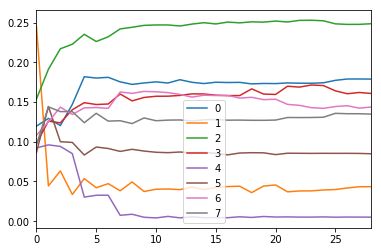

In [0]:
# size of cadre vs iterations

newborn_best.proportions.plot()

In [0]:
newborn_best.scoreMetrics(d_newborn_te)
           

,loss,accuracy,ROC_AUC,PR_AUC
0,4.044676,0.791793,0.740185,0.5568


In [0]:
## example of how to use precision_metrics()
from precision_metrics import precision_metrics
scores_newborn = precision_metrics(d_newborn_tr,d_newborn_te, newborn_best, 'newborn')

In [0]:
scores_newborn

,dataset,m,size,proportion,accuracy,ROC_AUC,PR_AUC,F1_score
0,newborn,0,2885,0.115771,0.884229,0.613770,0.185332,0.246204
1,newborn,1,1836,0.225490,0.775054,0.639894,0.395480,0.423853
2,newborn,2,608,0.259868,0.740132,0.707053,0.420382,0.490694
3,newborn,3,1765,0.237960,0.762040,0.705667,0.442920,0.480818
4,newborn,4,1007,0.358491,0.676266,0.707793,0.608235,0.579011
5,newborn,5,2938,0.448945,0.730769,0.787213,0.767327,0.710545
6,newborn,6,823,0.292831,0.707169,0.550292,0.351290,0.450344
7,newborn,7,1980,0.114646,0.885354,0.647910,0.194898,0.268041


In [0]:
# overall F1 score
def overallf1(train,test,model):
    Ftr, __, __, __, __ = model.predictFull(train)
    Fte, __, __, __, __ = model.predictFull(test)
    tau = optimalTau(np.squeeze(Ftr), (train.iloc[:,-1].values))
    y_pred = (np.squeeze(Fte) >= tau)*1
    return f1_score(test.iloc[:,-1].values, y_pred)

In [0]:
# overall f1 score for newborn, circ and preg
f1_newborn=overallf1(d_newborn_tr,d_newborn_te,newborn_best)
f1_newborn

0.5128935745832739

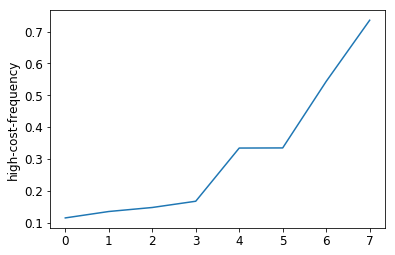

In [0]:
# just change the order of labels so that cost for each cluster goes from low to high
__, __, __, labTrain, __ = newborn_best.predictFull(d_newborn_tr)
__, __, __, labTest, __ = newborn_best.predictFull(d_newborn_te)
Labels = np.append(labTrain,labTest)

target= pd.DataFrame(np.append(d_newborn_tr.iloc[:,-1],d_newborn_te.iloc[:,-1],axis=0),columns=['Target'])
cadre = pd.DataFrame(Labels,columns=['Cadre'])
target['Cadre']= cadre['Cadre']
highcostratio = np.array([])
clustpop = np.array([])
for i in range(8):
    pop = target[target['Cadre']==i]['Target'].shape[0]
    clustpop = np.append(clustpop,pop)
    ratio = np.count_nonzero(target[target['Cadre']==i]['Target'].values)*1.0/pop
    highcostratio= np.append(highcostratio,ratio)
x = np.arange(8)
b=sns.lineplot(x=x,
               y=sorted(highcostratio))
plt.xticks(x,x)
#b.set_xlabel("X Label",fontsize=30)
b.set_ylabel("high-cost-frequency",fontsize=12)
b.tick_params(labelsize=12)

In [0]:
# Order labels
sortedLabels = np.argsort( highcostratio ).tolist()
Labels2 = np.zeros( Labels.shape)-1
index = 0

for sortedNumber in sortedLabels:
    inNumber = np.where( Labels == sortedNumber)[0]
    Labels2[inNumber] = index
    index += 1
Labels = Labels2   

In [0]:
# #plot highcost ratio among cadres
# from highcostratio import highcostplot
# target,Labels,highcostratio,remove_index = highcostplot(d_newborn_tr,d_newborn_te, newborn_best)
# # the log odds ratios of being highcost in different clusters
from ftest_logodds import restest
restest(np.expand_dims(Labels,axis=1),
        np.expand_dims(target['Target'],axis=1)).round(2)

array([-1.01, -0.85, -0.77, -0.58,  0.56,  0.5 ,  1.29,  2.24])

In [0]:
# Calculate log odds ratios for feature vs. cluster, uncorr
from ftest_logodds import ftest_uncorr
features = list(newborn.iloc[:,:-1])
data = np.append(d_newborn_tr.iloc[:,:-1],d_newborn_te.iloc[:,:-1],axis=0)
np_feat = np.asarray(features)
labs = np.expand_dims(Labels,axis=1)
feat_table,lor_table =ftest_uncorr(data,labs,np_feat)

In [0]:
# reduce feature length
new_feat = [s.replace('CCS.DX_' , '') for s in features]
new_feat = [s.replace('CCS.PROC_' , '') for s in new_feat]
new_feat = [s.replace(' not mental disorders or infectious disease','')for s in new_feat]
new_feat = [s.replace('birth weight; and','BW&')for s in new_feat]
new_feat = [s.replace('sexually transmitted disease','STD')for s in new_feat]
new_feat = [s.replace('tuberculosis','TB')for s in new_feat]
new_feat = [s.replace('system','syst')for s in new_feat]
new_feat = [s.replace('Other','Ot')for s in new_feat]
new_feat = [s.replace('OTHER','Ot')for s in new_feat]

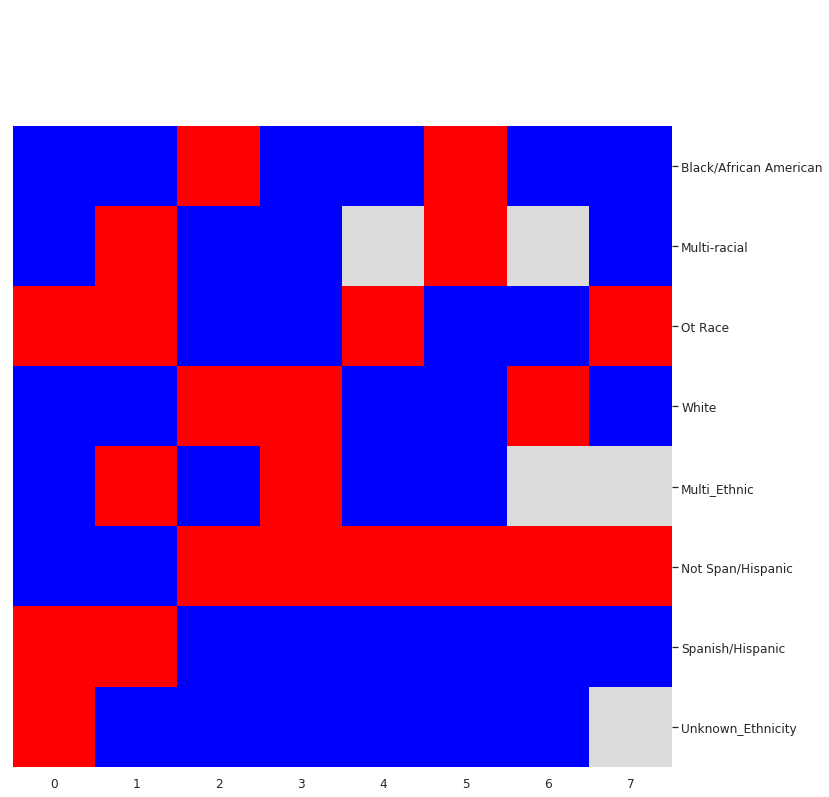

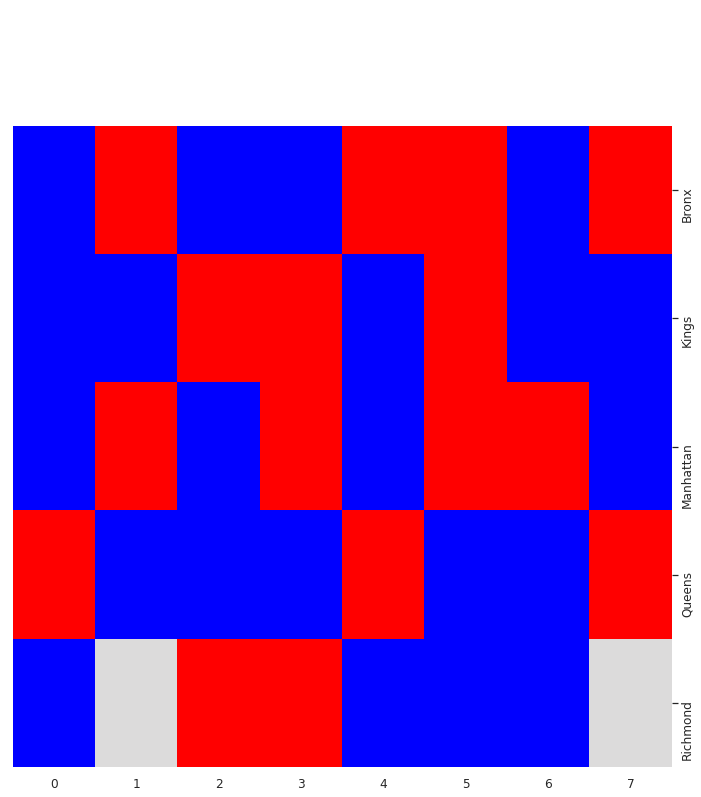

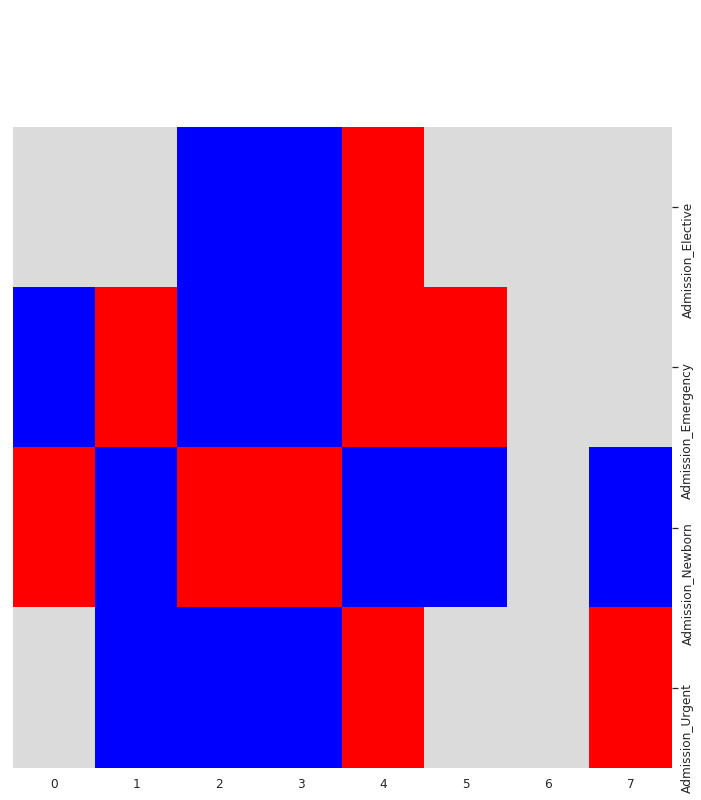

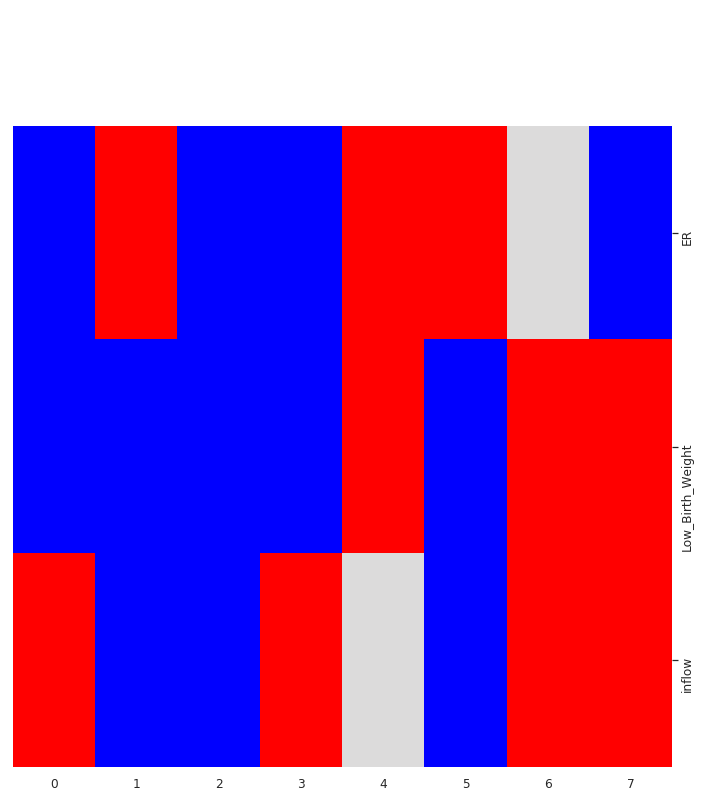

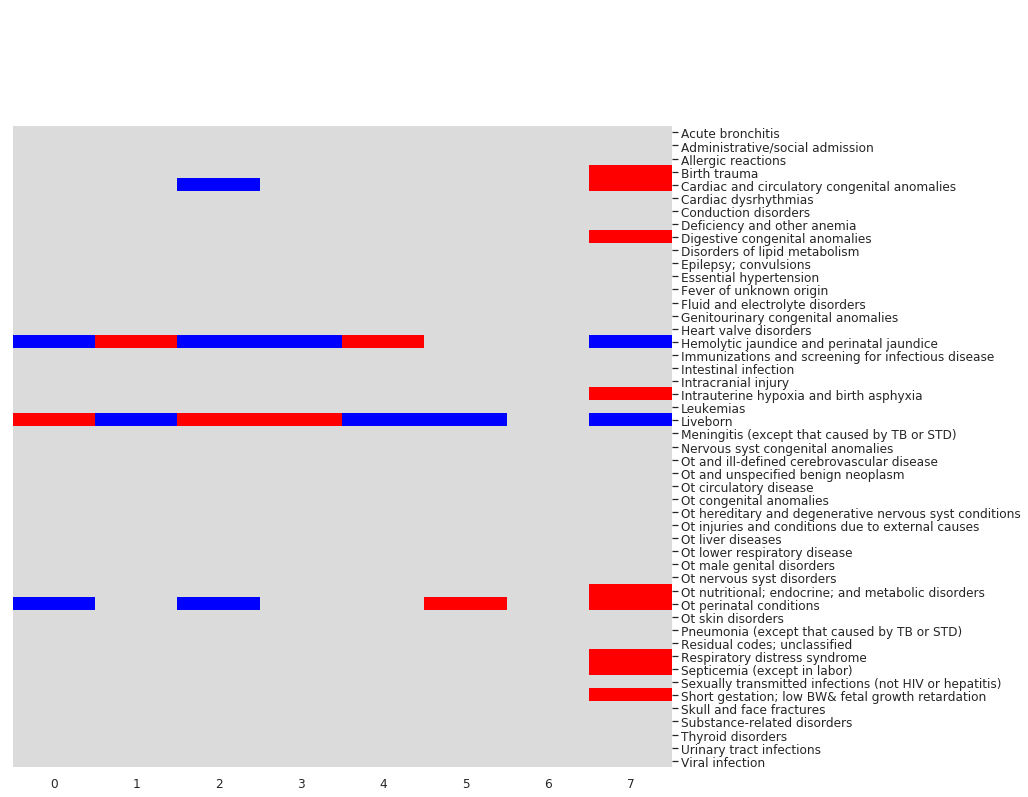

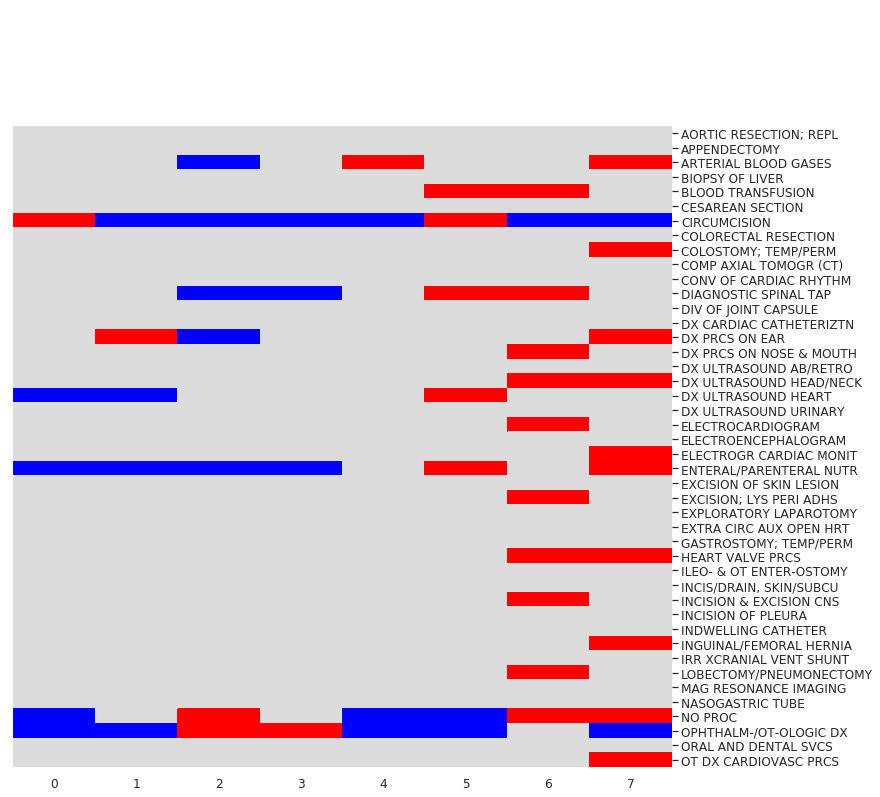

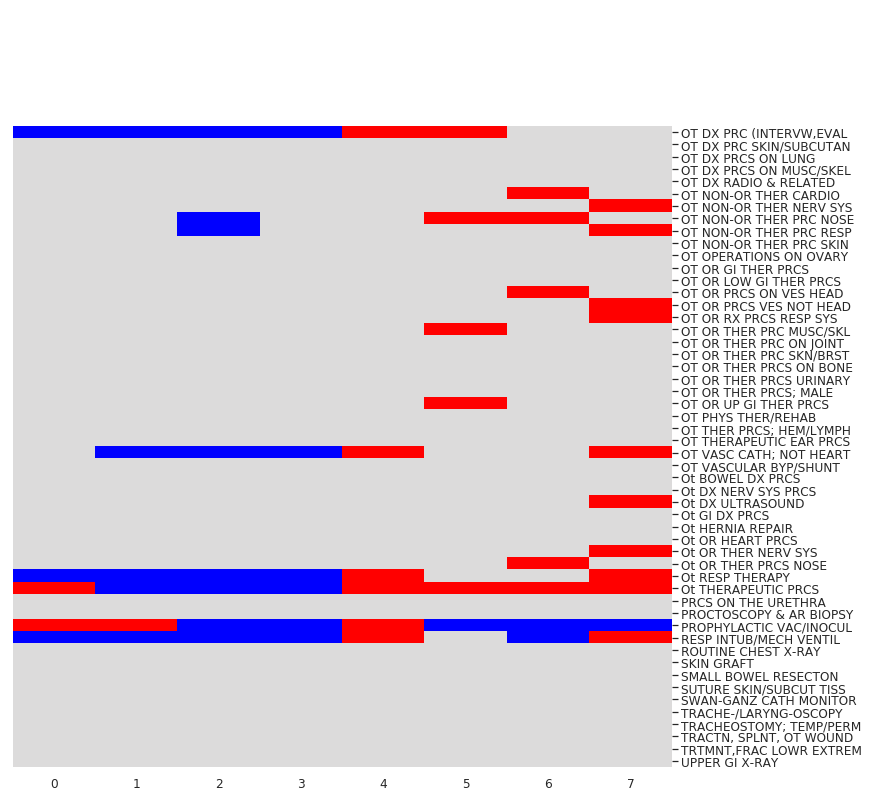

In [0]:
# clustermaps of segments of features.
# Red indicates a given feature has significant positive log ordds ratio to a given cluster, 
# light purple no significance, blue significant negative.
from clustmap import plotclustmap

sns.set(font_scale=1.1)
# racial features
plotclustmap(feat_table[:,11:19].T,None,np.array(new_feat)[11:19],None,None)
plt.yticks(rotation=0) 
# county features
plotclustmap(feat_table[:,3:8].T,None,np.array(new_feat)[3:8],None,None)
plt.yticks(rotation=0)

# # # admission features
plotclustmap(feat_table[:,19:23].T,None,np.array(new_feat)[19:23],None,None)
plt.yticks(rotation=0)

# ER, Low BW, Inflow
plotclustmap(feat_table[:,0:3].T,None,np.array(new_feat)[0:3],None,None)
plt.yticks(rotation=0)

# # #disease features
plotclustmap(feat_table[:,23:72].T,None,np.array(new_feat)[23:72],None,None)
# # # procedure features
plotclustmap(feat_table[:,72:116].T,None,np.array(new_feat)[72:116],None,None)
plotclustmap(feat_table[:,116:].T,None,np.array(new_feat)[116:],None,None)

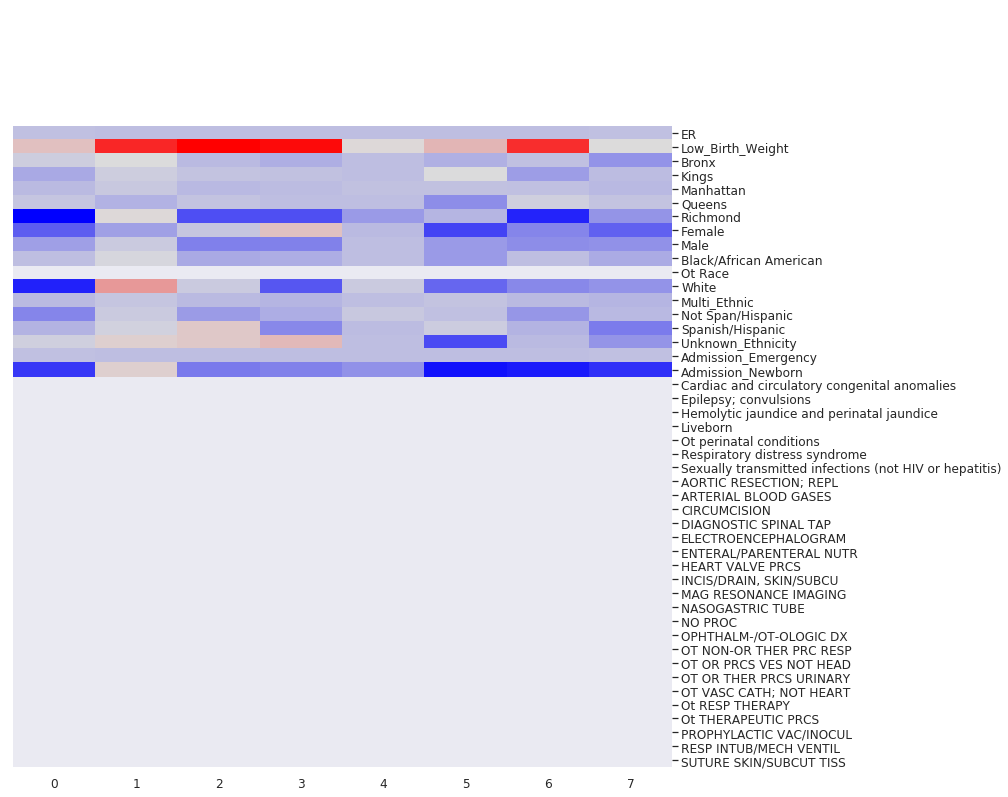

In [0]:
# create a binary version of the weights: red, weight>0, blue , weight <0
#bin_weights = (newborn_best.W[abs(newborn_best.W.T).sum()>1e-1]>0)*1 + (newborn_best.W[abs(newborn_best.W.T).sum()>1e-1]<0)*(-1) 
th = 1e-3
plotclustmap(newborn_best.W[abs(newborn_best.W).sum(axis=1)/8>th],None,np.array(new_feat)[abs(newborn_best.W).sum(axis=1)/8>th],None,None)